# Exercise Data Analysis on Distance

## Distance Traveled per Day

Many runners and bicyclists use distance as a way to track their exercise activity. Distance is an easy way to increase activity incrementally as their body adjusts to exercise. As there is no indicator in the data set as to whether each activity is on bicycle or on foot this is not a perfect analysis of increased activity, but it is certainly a good place to start. Below I have created a scatter plot that shows the distance Professor Brookes traveled each data according to his fitness readings.

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from math import sin, cos, sqrt, atan2, radians

In [18]:
df = pd.read_csv('assets/strava.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['day'] = df['timestamp'].dt.date


In [41]:
df_dist = df[['datafile', 'distance', 'day']]
df_dist = df_dist.groupby('day')['distance'].last().reset_index()
df_dist.head(5)

day  distance
0  2019-07-08   2617.46
1  2019-07-10    834.85
2  2019-07-12   7473.66
3  2019-07-14   2613.32
4  2019-07-16   1704.76

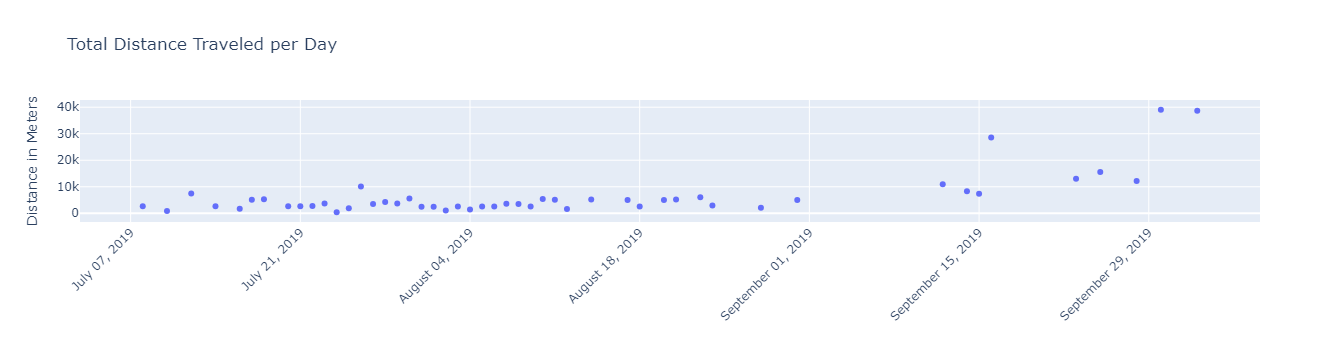

In [29]:
fig = px.scatter(x=df_dist['day'], y=df_dist['distance'], title='Total Distance Traveled per Day')
fig.update_layout(
    xaxis_title='',
    yaxis_title='Distance in Meters')
fig.update_xaxes(tickangle=-45, tickformat='%B %d, %Y')
fig.show()

Looking at the scatter plot, it looks like there were gently increases and decreases in distance until about September, where it seems that Professor Brookes started significantly increasing the distance he traveled when he exercised. This could be an increase in the time he exercised or it could be because he started using a bicycle more.

## Path and Distance Traveled

My next visualization I wanted to show a more compelling way to show the distance traveled and how it changed over time, so I created a mapbox plot. This gives the user a way to show all the paths they traeled or just specific ones. It also shows the exact path Professor Brookes traveled each day and if the user hovers over the path, they can see how far that he traveled at each point. I tried to incorporate a topographical map to show how he traveled different altitudes as well, but then you lose some of the street level detail and my coding knowledge wasn't quite there to generate a topographical map with access tokens and all that. It would be a great way to take this visualization a step further to have street details and topographical details in a way that wasn't overwhelming. 

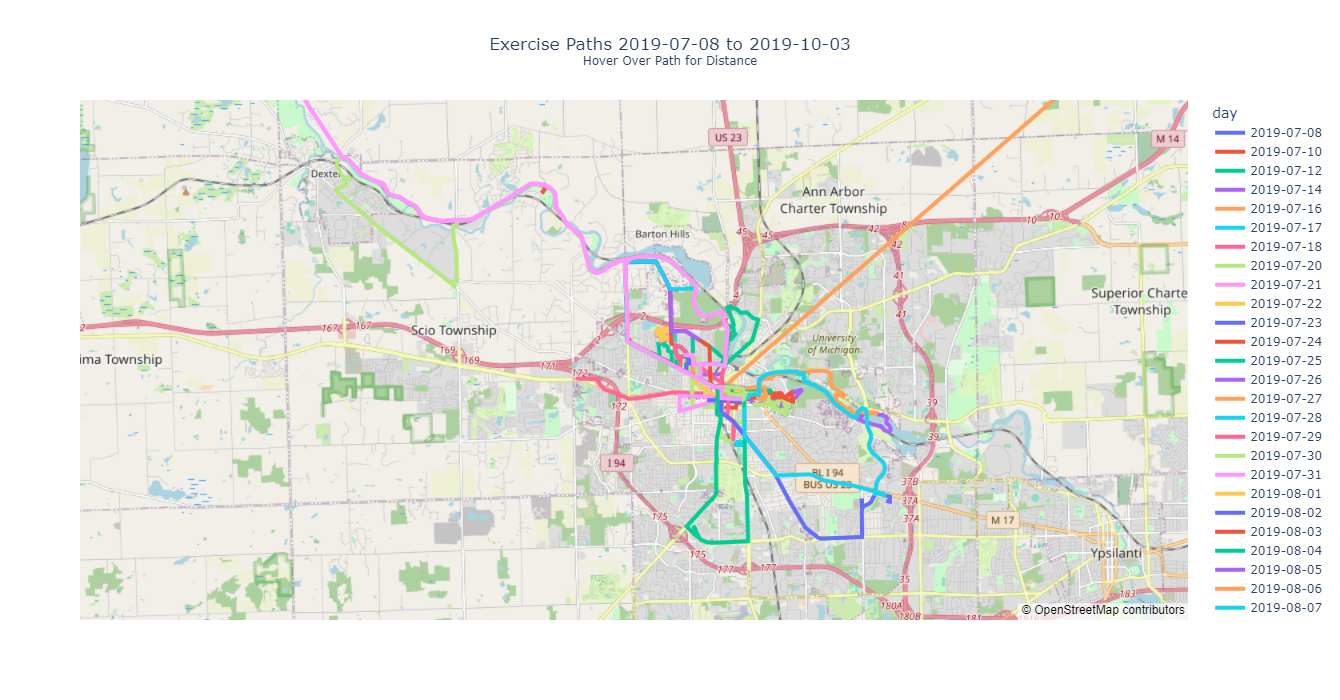

In [40]:
df_map = df[['datafile', 'position_lat', 'position_long','distance', 'day']]
sc_to_degree = 180 / 2**31
day0 = df_dist['day'][0]
day = df_dist['day'][48]


df_map['position_lat'] = df_map['position_lat'] * sc_to_degree
df_map['position_long'] = df_map['position_long'] * sc_to_degree
# df_map = df_map[df_map['datafile'] == 'activities/2675855419.fit.gz']
df_map = df_map.dropna()
df_map

df_map['distance'] = df_map['distance'].astype(str) + ' meters'

fig = px.line_mapbox(df_map, lat='position_lat', lon='position_long', zoom=9, height=700, width=1100, hover_name='distance', color='day',
                     center={'lat': df_map['position_lat'].mean(), 'lon': df_map['position_long'].mean()},
                    title=f'Exercise Path on {day}')
fig.update_layout(mapbox_style="open-street-map", mapbox_zoom=11, title={
        'text': f"Exercise Paths {day0} to {day}<br><sup>Hover Over Path for Distance</sup>",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }) 
fig.update_traces(line=dict(width=4))


fig.show()

This visualization shows the path and distance Professor Brookes traveled each day. The legend on the right allows the user to select which day they want to look at or all of them together, or a specific set of days. There are also zoom option at the top right for more interactivity. Professor Brookes traveled a lot in the center of campus and as time went on he traveled further on his excursions and outside the city. 